In [21]:
import pandas as pd

melbourne_file_path = '/Users/Rich/Desktop/Kaggle/Kaggle_learn/Intro_to_ML/melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path) 

melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [22]:
melbourne_data = melbourne_data.dropna(axis=0)

In [23]:
#房價是我們要預測的目標稱作y(標籤)
y = melbourne_data.Price
y

1        1035000.0
2        1465000.0
4        1600000.0
6        1876000.0
7        1636000.0
           ...    
12205     601000.0
12206    1050000.0
12207     385000.0
12209     560000.0
12212    2450000.0
Name: Price, Length: 6196, dtype: float64

In [5]:
#選取x(特徵)
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

In [24]:
X = melbourne_data[melbourne_features]
X

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.80790,144.99340
2,3,2.0,134.0,-37.80930,144.99440
4,4,1.0,120.0,-37.80720,144.99410
6,3,2.0,245.0,-37.80240,144.99930
7,2,1.0,256.0,-37.80600,144.99540
...,...,...,...,...,...
12205,3,2.0,972.0,-37.51232,145.13282
12206,3,1.0,179.0,-37.86558,144.90474
12207,1,1.0,0.0,-37.85588,144.89936
12209,2,1.0,0.0,-37.85581,144.99025


In [25]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [26]:
#顯示五筆資料
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


In [9]:
!pip3 install sklearn

Defaulting to user installation because normal site-packages is not writeable


In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
melbourne_model = DecisionTreeRegressor(random_state=1)

melbourne_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

[Text(0.5, 0.9, 'X[0] <= 3.5\nsquared_error = 455762632164.557\nsamples = 6196\nvalue = 1068828.202'),
 Text(0.25, 0.7, 'X[0] <= 2.5\nsquared_error = 231091546371.61\nsamples = 4600\nvalue = 892052.488'),
 Text(0.125, 0.5, 'X[2] <= 80.5\nsquared_error = 96508098732.512\nsamples = 2059\nvalue = 675606.991'),
 Text(0.0625, 0.3, 'X[0] <= 1.5\nsquared_error = 39755215618.225\nsamples = 898\nvalue = 539603.746'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'X[3] <= -37.748\nsquared_error = 115032110315.095\nsamples = 1161\nvalue = 780801.577'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'X[3] <= -37.752\nsquared_error = 271423005215.301\nsamples = 2541\nvalue = 1067440.634'),
 Text(0.3125, 0.3, 'X[4] <= 144.892\nsquared_error = 298116615247.179\nsamples = 1824\nvalue = 1199370.367'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'X[3] <= -37.

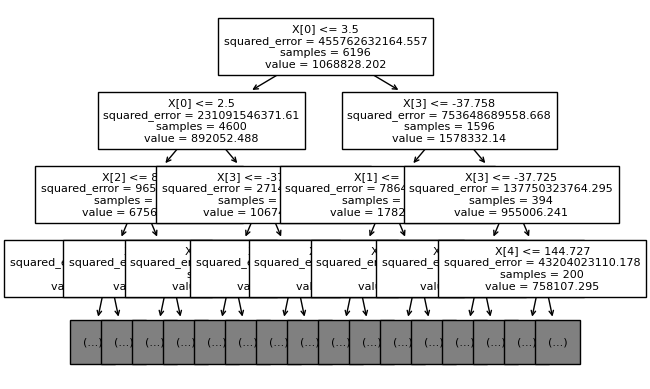

In [29]:
tree.plot_tree(melbourne_model, max_depth=3, fontsize=8)

In [31]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


In [37]:
print(melbourne_data['Price'].nunique())

1570


In [36]:
node_count = melbourne_model.tree_.node_count
node_count

12033

In [38]:
leaf_count = node_count + 1 - melbourne_model.tree_.max_depth
leaf_count

12005

In [13]:
home_data = pd.read_csv('/Users/Rich/Desktop/Kaggle/Kaggle_learn/Intro_to_ML/home_data.csv')
home_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [14]:
#標籤是誰
home_data = home_data.SalePrice

#特徵是誰
feature_names = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
#設定X
X = home_data[feature_names] 

#使用決策數模型
from sklearn.tree import DecisionTreeRegressor
iowa_model = DecisionTreeRegressor(random_state=1)

#fit the model
iowa_model.fit(X, y)
#預測
predictions = iowa_model.predict(X)



KeyError: "None of [Index(['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath',\n       'BedroomAbvGr', 'TotRmsAbvGrd'],\n      dtype='object')] are in the [index]"